In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
nav_df = pd.read_csv('../.tmp/navigation_df.csv', index_col= 0)
rocks_df = pd.read_csv('../.tmp/rocks_df.csv', index_col = 0)
obs_map = pd.read_csv('../.tmp/obs_map.csv', index_col =0)
obs_map = obs_map > 0
obs_df = pd.read_csv('../.tmp/obs_df.csv', index_col = 0)
obs_pix_df = pd.read_csv('../.tmp/obs_pix.csv', index_col = 0)

In [3]:
print(rocks_df.shape)
print(rocks_df.head())
print(nav_df.shape)
print(nav_df.head())
print(obs_df.head())


(0, 2)
Empty DataFrame
Columns: [angles, distance]
Index: []
(2107, 2)
     angles    distance
0 -0.261139  120.070812
1 -0.263307  119.104996
2 -0.240846  117.388245
3 -0.257324  117.881296
4 -0.265510  118.139748
     angles    distance
0  0.785398  226.274170
1  0.782263  225.568172
2  0.779109  224.864404
3  0.775935  224.162887
4  0.772741  223.463644


In [4]:
print(nav_df.describe())

            angles     distance
count  2107.000000  2107.000000
mean     -0.340468    96.397718
std       0.213396    13.252255
min      -0.632749    70.611614
25%      -0.499000    85.146932
50%      -0.367174    96.840074
75%      -0.241300   107.436027
max       0.317459   122.967475


In [5]:
print(obs_df.describe())

             angles      distance
count  46448.000000  46448.000000
mean       0.034170    127.418459
std        0.920176     44.274045
min       -1.564507      1.000000
25%       -0.827489     97.616597
50%        0.161998    133.764719
75%        0.833649    159.100597
max        1.564546    226.274170


In [15]:
"""Find the normal at a range of rover yaw angles"""
right = -50
left = 15

yaws = []
distances = []
headings = range(right,left, 5)
for phi in headings:
    phi = np.deg2rad(phi)

    
    ar = np.min(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].distance)
    a = np.min(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].angles)
    br = np.max(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].distance)
    b = np.max(obs_df[(obs_df.angles > phi-0.01) & (obs_df.angles < phi+0.01)].angles)
    
    max_threshold = 50
    if (ar > max_threshold) & (br > max_threshold) :
        normal = 0 
    else :
        ax, ay = np.sin(a)*ar, np.cos(a)*ar
        bx, by = np.sin(b)*br, np.cos(b)*br

        normal = ((bx - ax) / (ay - by))
    print('normal angle: {}'.format(normal))
    yaw = normal - (np.pi/4)
    yaws.append(yaw)
    distances.append(np.mean([ar,br]))
    
m1 = np.mean(yaws)
m2 = np.average(yaws, weights=[1/d for d in distances])
m3 = np.average(yaws, weights = [(phi - np.abs(h)) for h in headings]/(phi))
m4 = np.mean([m3,m2])
    
print('mean yaw angle: {}'.format(m1))
print('weighted mean yaw angle: {}'.format(m2))
print('weighted by heading yaw angle: {}'.format(m3))
print('weighted average: {}'.format(m4))    

normal angle: 1.166112563151205
normal angle: 0.9799506586040088
normal angle: 0.8195455354457079
normal angle: 0
normal angle: 0.5629132340018644
normal angle: 0
normal angle: 0.35178881526723094
normal angle: 0
normal angle: 0
normal angle: 0
normal angle: -0.010125783691382407
normal angle: 0
normal angle: -0.18975264061648195
mean yaw angle: -0.5022879801542058
weighted mean yaw angle: -0.4933992040396355
weighted by heading yaw angle: -0.24124935656590205
weighted average: -0.36732428030276876


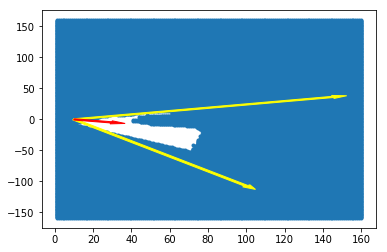

In [16]:
arrow_length = 20
# m3 = 0
f, axarr = plt.subplots(1)
axarr.plot(obs_pix_df.xpix, obs_pix_df.ypix, '.')
x_arrow = arrow_length * np.cos(m3)
y_arrow = arrow_length * np.sin(m3)
axarr.arrow(10,0, 140*np.cos(np.deg2rad(right)), 140*np.sin(np.deg2rad(right)), color='yellow', zorder=2, head_width=5, width=2)
axarr.arrow(10,0, 140*np.cos(np.deg2rad(left)), 140*np.sin(np.deg2rad(left)), color='yellow', zorder=2, head_width=5, width=2)

axarr.arrow(10, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=5, width=2)
plt.show()